In [19]:
import math
import sys

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, s3_load_trial_quick
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import TOPICS_STATIC, get_len_trial, TOPICS_STATIC_SMALL, LATENT_STATIC_SMALL
from reclab.recommenders import RandomRec, TopPop


In [15]:
# S3 storage parameters
bucket_name = 'recsys-eval'
bucket = boto3.resource('s3').Bucket(bucket_name)
data_dir = 'master'
overwrite = False

# Experiment setup.
n_trials = 10
trial_seeds = [i for i in range(n_trials)]
num_init_ratings = TOPICS_STATIC['optional_params']['num_init_ratings']

environment_name = TOPICS_STATIC['name']
env_name = TOPICS_STATIC['name']

# Recommender setup
recommender_names = ['RandomRec', 'TopPop', 'PerfectRec']

In [16]:
all_ratings = []
all_predictions = []
for rec_name in recommender_names:
    all_ratings.append([])
    all_predictions.append([])
    print('Loading trials for recommender:', rec_name)
    for seed in trial_seeds:
        print('Loading trial with seed:', seed)
        dir_name = s3_experiment_dir_name(data_dir, env_name, rec_name, seed)
        ratings, predictions = s3_load_trial_quick(bucket, dir_name)
        all_ratings[-1].append(ratings)
        all_predictions[-1].append(predictions)


Loading trials for recommender: RandomRec
Loading trial with seed: 0
Loading trial with seed: 1
Loading trial with seed: 2
Loading trial with seed: 3
Loading trial with seed: 4
Loading trial with seed: 5
Loading trial with seed: 6
Loading trial with seed: 7
Loading trial with seed: 8
Loading trial with seed: 9
Loading trials for recommender: TopPop
Loading trial with seed: 0
Loading trial with seed: 1
Loading trial with seed: 2
Loading trial with seed: 3
Loading trial with seed: 4
Loading trial with seed: 5
Loading trial with seed: 6
Loading trial with seed: 7
Loading trial with seed: 8
Loading trial with seed: 9
Loading trials for recommender: PerfectRec
Loading trial with seed: 0
Loading trial with seed: 1
Loading trial with seed: 2
Loading trial with seed: 3
Loading trial with seed: 4
Loading trial with seed: 5
Loading trial with seed: 6
Loading trial with seed: 7
Loading trial with seed: 8
Loading trial with seed: 9


In [18]:
all_ratings = np.array(all_ratings)
all_predictions = np.array(all_predictions)

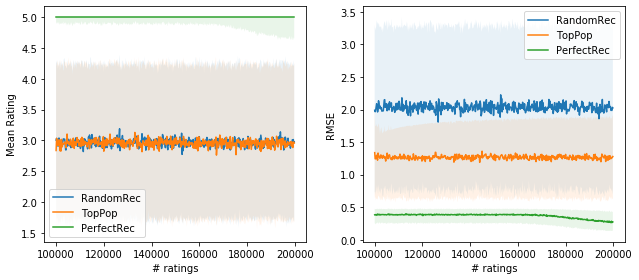

In [20]:
plot_ratings_mses(all_ratings,
                      all_predictions,
                      recommender_names,
                      summary_type='median',
                      num_init_ratings=num_init_ratings, threshold=10)

# Testing TopPop

In [32]:
bucket_name = None

n_trials = 3
trial_seeds = [i for i in range(n_trials)]
len_trial = get_len_trial(LATENT_STATIC_SMALL)
num_init_ratings = LATENT_STATIC_SMALL['optional_params']['num_init_ratings']

# Environment setup
environment_names = [LATENT_STATIC_SMALL['name'], TOPICS_STATIC_SMALL['name']]
envs = [LatentFactorBehavior(**LATENT_STATIC_SMALL['params'], **LATENT_STATIC_SMALL['optional_params']), 
       Topics(**TOPICS_STATIC_SMALL['params'], **TOPICS_STATIC_SMALL['optional_params'])]

# Recommender setup
recommender_names = ['TopPop', 'RandomRec']


In [33]:
recommenders = [TopPop(), RandomRec()]

res = run_env_experiment(
        envs,
        recommenders,
        trial_seeds,
        len_trial,
        environment_names=environment_names,
        recommender_names=recommender_names,
        bucket_name=bucket_name)
all_ratings, all_predictions, all_dense_ratings, all_dense_predictions = res

Started experiments on environment: latent_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 16.52941176470588%
Running trials for recommender: TopPop
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2




Running trials for recommender: RandomRec
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Started experiments on environment: topics_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 28.135294117647057%
Running trials for recommender: TopPop
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: RandomRec
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2


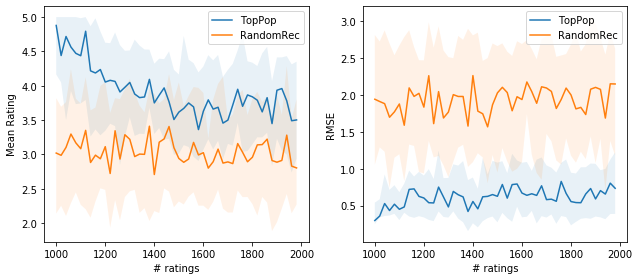

In [38]:
## Looking at Latent Factors

plot_ratings_mses(all_ratings[0],
                      all_predictions[0],
                      recommender_names,
                      summary_type='median',
                      num_init_ratings=num_init_ratings, threshold=10)

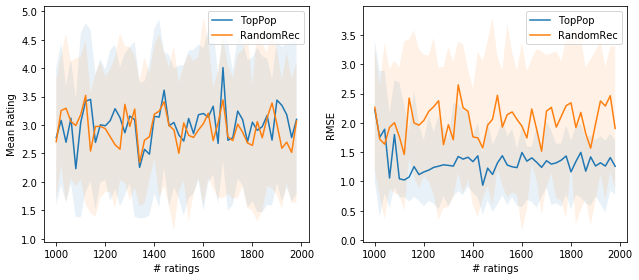

In [39]:
## Looking at Topics

plot_ratings_mses(all_ratings[1],
                      all_predictions[1],
                      recommender_names,
                      summary_type='median',
                      num_init_ratings=num_init_ratings, threshold=10)